In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd

In [2]:
# --- トイデータの作成 ---
np.random.seed(20201224)

n0, mu0, variance0 = 200, [10, 11], 20 # n = number of data
data0 = multivariate_normal(mu0, np.eye(2) * variance0, n0)
df0 = pd.DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 = 150, [18, 20], 22 # n = number of data
data1 = multivariate_normal(mu1, np.eye(2) * variance1, n1)
df1= pd.DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int (len (df) * 0.8)
train_set = df[:num_data]
test_set = df[num_data:]

train_set # データを表示

,x1,x2,t
0,16.453854,14.882724,1
1,-0.044271,11.226154,0
2,10.270329,8.557856,0
3,15.189702,19.410997,1
4,19.424480,10.684027,0
...,...,...,...
275,20.655680,21.723042,1
276,9.685182,13.165120,0
277,20.349387,16.950134,1
278,17.778036,20.983005,1


In [3]:
# 入力と出力に分けて，ndarrayにする
train_x = train_set[['x1', 'x2']].values
train_t = train_set['t'].values.reshape([len(train_set), 1])
test_x = test_set[['x1', 'x2']].values
test_t = test_set['t'].values.reshape([len(test_set), 1])

In [4]:
# --- tensorflowで学習するための領域確保 ---
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x, w) + w0 # ブロードキャストルール
p = tf.sigmoid(f) # ブロードキャストルール

In [5]:
# --- 損失関数を定義 ---
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t * tf.log(p) + (1 - t) * tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)
print(loss)
print(train_step)

Tensor("Neg:0", shape=(), dtype=float32)
name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/update_Variable_1/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [6]:
# 正解率
correct_prediction = tf.equal(tf.sign(p - 0.5), tf.sign(t - 0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
# --- パラメータの最適化 ---
sess = tf.Session()
sess.run(tf.initialize_all_variables())
train_accuracy = []
test_accuracy = []
i = 0
for _ in range(2500):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if (i % 20 == 0):
        # loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
        acc_val1 = sess.run(accuracy, feed_dict = {x:train_x, t:train_t})
        train_accuracy.append(acc_val1)
        acc_val2 = sess.run(accuracy, feed_dict = {x:test_x, t:test_t})
        test_accuracy.append(acc_val2)
        # print('Step: %d, Loss: %f, Accuracy: %f'% (i, loss_val, acc_val))
        print('Step: %d, Accuracy (train): %f, Accuracy (test): %f'%(i, acc_val1, acc_val2))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step: 20, Accuracy (train): 0.442857, Accuracy (test): 0.385714
Step: 40, Accuracy (train): 0.446429, Accuracy (test): 0.400000
Step: 60, Accuracy (train): 0.446429, Accuracy (test): 0.400000
Step: 80, Accuracy (train): 0.457143, Accuracy (test): 0.400000
Step: 100, Accuracy (train): 0.464286, Accuracy (test): 0.400000
Step: 120, Accuracy (train): 0.471429, Accuracy (test): 0.414286
Step: 140, Accuracy (train): 0.478571, Accuracy (test): 0.414286
Step: 160, Accuracy (train): 0.482143, Accuracy (test): 0.428571
Step: 180, Accuracy (train): 0.489286, Accuracy (test): 0.428571
Step: 200, Accuracy (train): 0.503571, Accuracy (test): 0.428571
Step: 220, Accuracy (train): 0.507143, Accuracy (test): 0.471429
Step: 240, Accuracy (train): 0.507143, Accuracy (test): 0.471429
Step: 260, Accuracy (train): 0.521429, Accuracy (test): 0.471429
Step: 280, Accuracy (train): 0.532143, Accuracy (test): 0.485714
Step: 300, Accuracy 

Step: 2460, Accuracy (train): 0.867857, Accuracy (test): 0.771429
Step: 2480, Accuracy (train): 0.871429, Accuracy (test): 0.771429
Step: 2500, Accuracy (train): 0.871429, Accuracy (test): 0.771429


In [8]:
# --- パラメータの可視化 ---
w0_val, w_val = sess.run([w0, w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print(w0_val, w1_val, w2_val)

-2.2336373 0.067319624 0.09339011


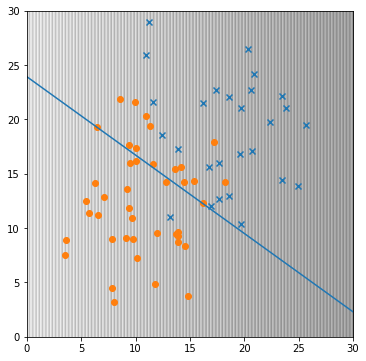

In [9]:
# --- 結果の可視化 ---
# train_set0 = train_set[train_set['t'] == 0]
# train_set1 = train_set[train_set['t'] == 1]
test_set0 = test_set[test_set['t'] == 0]
test_set1 = test_set[test_set['t'] == 1]

fig = plt.figure(figsize = (6, 6))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(0, 30)
subplot.set_ylim(0, 30)
# subplot.scatter(train_set1.x1, train_set1.x2, marker = 'x')
# subplot.scatter(train_set0.x1, train_set0.x2, marker = 'o')

subplot.scatter(test_set1.x1, test_set1.x2, marker = 'x')
subplot.scatter(test_set0.x1, test_set0.x2, marker = 'o')

linex = np.linspace(0, 30, 10)
liney = - (w1_val * linex / w2_val + w0_val / w2_val)

subplot.plot(linex, liney)

field = [[1 / (1 + np.exp(- (w0_val + w1_val * x1 + w2_val * x2))) for x1 in np.linspace(0, 30, 100) for x2 in np.linspace(0, 30, 100)]]
subplot.imshow(field, origin='lower', extent=(0, 30, 0, 30), cmap=plt.cm.gray_r, alpha=0.5)

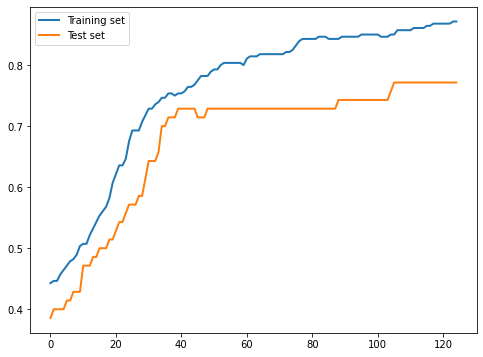

In [10]:
fig = plt.figure(figsize=(8, 6))
subplot = fig.add_subplot(1, 1, 1)
subplot.plot(range(len(train_accuracy)), train_accuracy, linewidth=2, label='Training set')
subplot.plot(range(len(test_accuracy)), test_accuracy, linewidth=2, label='Test set')
subplot.legend(loc='upper left')